# Medienverarbeitung Color and Tone Correction

In [1]:
import PIL

In [2]:
from PIL import ImageEnhance

In [3]:
import numpy as np

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
import cv2

In [6]:
import matplotlib.pyplot as plt

In [7]:
imagefile='Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/190.png'

In [8]:
img = PIL.Image.open(imagefile)

In [9]:
reduced_img = img.reduce(5)

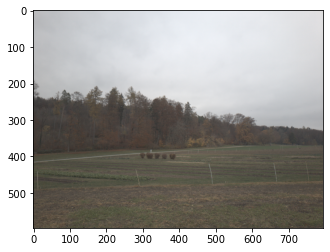

In [24]:
plt.imshow(reduced_img)

In [25]:
def f(x):
    preview_img = reduced_img
    converter = PIL.ImageEnhance.Contrast(reduced_img)
    img2 = converter.enhance(x/100)
    plt.imshow(img2)

In [26]:
interact(f, x=100);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Output()), _dom_classes=('widg…

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(img2)

In [ ]:
img = cv2.imread(imagefile)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [ ]:
plt.imshow(img)

In [ ]:
brightness = -2
contrast = -5
img = np.int16(img)
img = img * (contrast/127+1) - contrast + brightness
img = np.clip(img, 0, 255)
img = np.uint8(img)

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(hsv)

In [ ]:
hsv

In [ ]:
brightness = 50
contrast = 50
hsv = np.int16(hsv)
hsv = hsv * (contrast/127+1) - contrast + brightness
hsv = np.clip(hsv, 0, 255)
hsv = np.uint8(hsv)

In [ ]:
#hsv=hsv*1.5

In [ ]:
#hsv=hsv*0.66

In [ ]:
new_img=cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

In [ ]:
plt.imshow(hsv)

In [ ]:
plt.imshow(new_img)

In [ ]:
new_img=cv2.pyrMeanShiftFiltering(new_img,20,20)

In [ ]:
plt.imshow(new_img)